In [76]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [77]:
# Cargar datos
# Las dos primeras columnas contienen la nota de dos examenes y la tercera columna
# contiene la etiqueta que indica si el alumno ingreso o no a la universidad.
data = np.loadtxt('./LicenciaConducir.txt', delimiter=',')
X, y = data[:, 0:2], data[:, 2]
print(X)
print(y)

[[ 5.  6.]
 [ 9.  4.]
 [ 2. 10.]
 [10. 10.]
 [ 7.  9.]
 [ 8.  1.]
 [ 4.  9.]
 [ 7.  4.]
 [ 8.  9.]
 [ 7.  3.]
 [ 9. 10.]
 [ 2.  1.]
 [10.  1.]
 [ 9.  1.]
 [ 4.  2.]
 [ 9.  2.]
 [ 6.  9.]
 [ 5.  7.]
 [10.  6.]
 [ 3.  3.]
 [ 4.  1.]
 [ 6.  3.]
 [ 9.  5.]
 [ 7.  4.]
 [ 9.  8.]
 [ 8.  1.]
 [ 7.  3.]
 [ 9.  2.]
 [ 5.  4.]
 [ 1.  3.]
 [ 5.  1.]
 [10.  7.]
 [ 9.  7.]
 [10.  5.]
 [ 6.  6.]
 [ 5.  4.]
 [ 2. 10.]
 [ 1.  5.]
 [ 3.  8.]
 [ 3.  1.]
 [ 6.  6.]
 [ 3.  1.]
 [ 2.  8.]
 [ 9.  5.]
 [ 1.  5.]
 [ 3.  7.]
 [ 4.  7.]
 [ 3.  4.]
 [10.  4.]
 [ 9.  6.]
 [10.  5.]
 [ 8.  3.]
 [ 3.  1.]
 [10.  2.]
 [ 8.  5.]
 [ 7.  4.]
 [ 7.  5.]
 [ 8.  8.]
 [ 1.  7.]
 [ 1. 10.]
 [ 6.  9.]
 [ 3.  4.]
 [10.  6.]
 [ 7.  1.]
 [ 5.  4.]
 [ 9.  5.]
 [ 5.  9.]
 [ 3.  2.]
 [ 1.  9.]
 [ 4.  9.]
 [ 4.  4.]
 [ 6.  6.]
 [ 4.  5.]]
[1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1.
 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0

In [78]:
def plotData(X, y):
    # Gragica los puntos de datos X y y en una nueva figura. Grafica los puntos de datos con * para los positivos y 
    # o para los negativos.
    
    # Crea una nueva figura
    fig = pyplot.figure()

    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0

    # Plot Examples
    pyplot.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    pyplot.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)

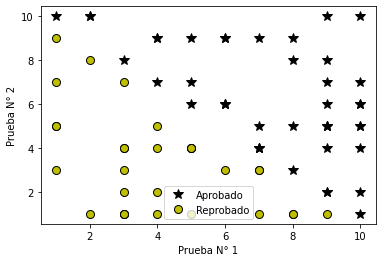

In [79]:
plotData(X, y)
# adiciona etiquetas para los ejes
pyplot.xlabel('Prueba N° 1')
pyplot.ylabel('Prueba N° 2')
pyplot.legend(['Aprobado', 'Reprobado'])
pass

In [80]:
#Funcion sigmoide

def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)
  
    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [81]:
# Prueba la implementacion de la funcion sigmoid
z = 21
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 21 ) =  0.9999999992417439


In [82]:
#Funcion costo gradiente

# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción. 
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [83]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    
    return J

In [84]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []
    
    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)
       
        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

theta calculado por el descenso por el gradiente: [-0.00136645  0.06288716  0.06016125]
Una persona para poder sacar licencia de conducir tiene las siguientes pruebas 
 Prueba 1: 5
 Prueba 2: 4
 (usando el descenso por el gradiente):1


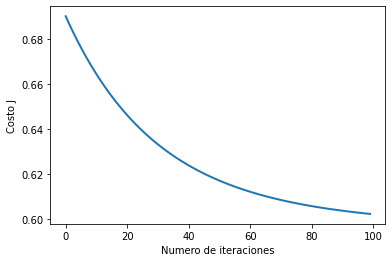

In [87]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 100

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(3)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar si ingresa o no a la universidad
X_array = [1, 5, 4]
aprueba = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

print('Una persona para poder sacar licencia de conducir tiene las siguientes pruebas \n Prueba 1: 5\n Prueba 2: 4\n (usando el descenso por el gradiente):{:.0f}'.format(aprueba))

In [88]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))
    
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y).dot(X)
    
    return J, grad

In [89]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(n+1)
print(initial_theta)
cost, grad = costFunction(initial_theta, X, y)

print('Costo en theta inicial (zeros): {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.693\n')
print(grad)
print('Gradiente en theta inicial (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[-0.1000, -12.0092, -11.2628]\n')

[0. 0. 0.]
Costo en theta inicial (zeros): 0.693
Costo esperado (aproximado): 0.693

[-0.0890411  -1.30821918 -1.18493151]
Gradiente en theta inicial (zeros):
	[-0.0890, -1.3082, -1.1849]
Gradiente esperado (aproximado):
	[-0.1000, -12.0092, -11.2628]



In [90]:
# Calcula y muestra el costo y el gradiente con valores de theta diferentes a cero

test_theta = np.array([-24, 0.2, 0.2])
#test_theta = np.array([-11.74749157, 0.09927308, 0.09316497])
print(test_theta)
cost, grad = costFunction(test_theta, X, y)

print('Costo en theta prueba: {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.218\n')

print('Gradiente en theta prueba:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[0.043, 2.566, 2.647]')

[-24.    0.2   0.2]
Costo en theta prueba: 12.537
Costo esperado (aproximado): 0.218

Gradiente en theta prueba:
	[-0.589, -4.274, -3.726]
Gradiente esperado (aproximado):
	[0.043, 2.566, 2.647]


In [91]:
def plotDecisionBoundary(plotData, theta, X, y):
    # hacer que theta sera un arreglo numpy
    theta = np.array(theta)

    # Graficar los datos (recordar que la primera columna en X es la intercepción)
    plotData(X[:, 1:3], y)

    if X.shape[1] <= 3:
        # Solo se requieren 2 puntos para definir una linea, para lo cual se eligen dos puntos finales
        plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

        # Calcular la línea límite de decisión
        plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])

        print(plot_x)
        print(plot_y)
        # Graficar y ajustar los ejes para una mejor visualización
        pyplot.plot(plot_x, plot_y)

        # Leyenda, especifica para el ejercicio
        pyplot.legend(['Admitido', 'No admitido', 'Limite de decisión'])
        pyplot.xlim([30, 100])
        pyplot.ylim([30, 100])
    else:
        # Rango de la grilla
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((u.size, v.size))
        # Evalua z = theta*x sobre la grilla
        for i, ui in enumerate(u):
            for j, vj in enumerate(v):
                z[i, j] = np.dot(mapFeature(ui, vj), theta)

        z = z.T  # importante transponer z antes de llamar al contorno
        # print(z)

        # Plot z = 0
        pyplot.contour(u, v, z, levels=[0], linewidths=2, colors='g')
        pyplot.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)


[-1. 12.]
[  1.06802329 -12.52100853]


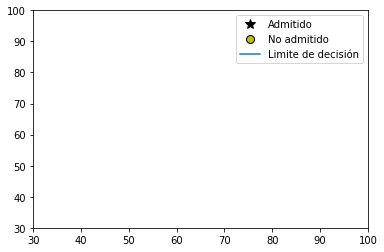

In [92]:
# Graficar limites
plotDecisionBoundary(plotData, theta, X, y)

In [73]:
#regresion logistica

def predict(theta, X):
    """
    Predecir si la etiqueta es 0 o 1 mediante regresión logística aprendida.
    Calcula las predicciones para X usando un umbral en 0.5 (es decir, si sigmoide (theta.T * x)> = 0.5, predice 1)

    Parametros
    ----------
    theta : array_like
        Parametros para regresion logistica. Un vecto de la forma (n+1, ).
    
    X : array_like
        Datos utilizados para el calculo de las predicciones. 
        La fila es el numero de los puntos para calcular las predicciones, 
        y las columnas con el numero de caracteristicas.

    Devuelve
    -------
    p : array_like
        Predicciones y 0 o 1 para cada fila en X. 
    """
    m = X.shape[0] # Numero de ejemplo de entrenamiento

    p = np.zeros(m)

    p = np.round(sigmoid(X.dot(theta.T)))
    return p

In [75]:
#  Predice la probabilidad de ingreso para un estudiante con nota de 45 en el examen 1 y nota de 85 en el examen 2
prob = sigmoid(np.dot([1, 5, 8], theta))
print('Para un estudiante con notas de 45 y 85, se predice una probabilidad de admisión de: {:.3f}%'.format(prob))
print('Valor esperado: 0.775 +/- 0.002\n')

# Compute accuracy on our training set
p = predict(theta, X)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y) * 100))
print('Precisión esperada (aproximadamente): 89.00 %')

Para un estudiante con notas de 45 y 85, se predice una probabilidad de admisión de: 0.689%
Valor esperado: 0.775 +/- 0.002

Precisión de entrenamiento: 58.90 %
Precisión esperada (aproximadamente): 89.00 %
